In [1]:
%matplotlib widget
# %matplotlib inline

import numpy as np
import cmath
import matplotlib.pyplot as plt
import os
print(os.getpid())
%cd ../../

import pylib.mix as mix
import kvn
import pylib.Chebyschev_coefs as ch
import pylib.qucf_read as qucf_r
import pylib.measurement as mse

27692
c:\Users\novikau1\Documents\work\codes\QuCF\scripts-py


In [2]:
# ---------------------------------------------------------------------------------------------------
# --- Some global parameters ---
# ---------------------------------------------------------------------------------------------------
colors_ = ["b", "r", "g", "magenta", "black"]
for _ in range(100):
    plt.close()

Chosen profile: y
Chosen parity: 0

Minimization method is used.
Computation status:  0.00024619580037302285

Chosen polynomial's degree:	 64
Number of coefficients:		 32
max. abs. error: 5.884e-03


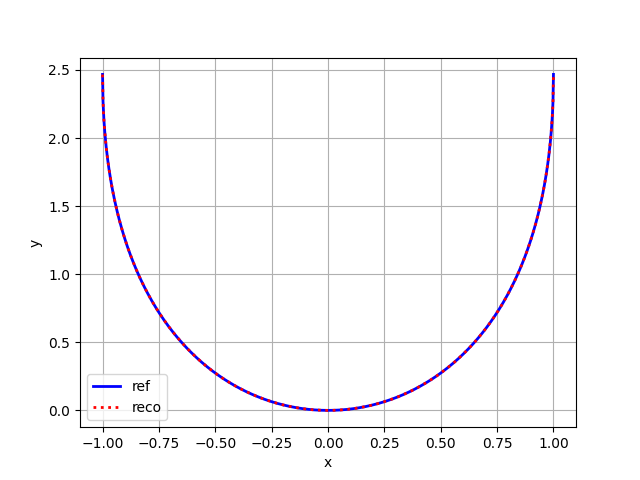

-----------------------------------------
--- Reconstructed function ---
-----------------------------------------


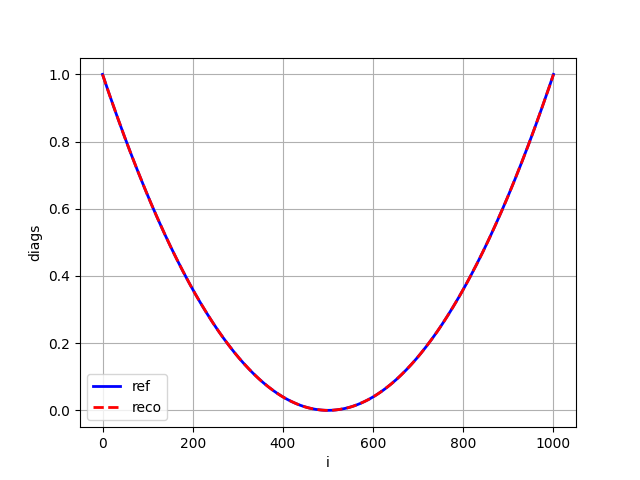

In [8]:
# --------------------------------------------------------
# --- Test 1: from F(asin[x]) back to F(x) ---
# --------------------------------------------------------
mix.reload_module(mix)
mix.reload_module(ch)
def test_1():
    F = lambda x:  x**2
    Nx = 1001
    x = np.linspace(-1.0, 1.0, Nx)

    # y, y_ref, Nd = F(x), F(x), 4
    y, y_ref, Nd = F(np.arcsin(x)), F(x), 64

    # --- Compute the Chebyschev coefficients ---
    oo_ch_ = ch.Ch_()
    oo_ch_.choose_method(0)
    oo_ch_.choose_func(
        -1, 0.0, 
        profile_in = y,
        name_prof  = "y",
        parity_in  = 0,
        path_root_in = "./jupyter-notebooks/NL/BE/coefs/",
        x_grid = x # !!!
    )
    oo_ch_.compute_Ch(Nd)
    oo_ch_.plot_reconstructed_function()
    # oo_ch_.plot_errors()
    # oo_ch_.plot_coefficients()

    # --- Reconstrcut the function ---
    print("-----------------------------------------")
    print("--- Reconstructed function ---")
    print("-----------------------------------------")
    y_reco = oo_ch_.get_rec_y_sin_x()
    # y_reco = oo_ch_.get_rec_y_x()

    # --- PLOTTING ---
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(range(len(x)), y_ref,   "-", color="b", linewidth = 2, label = "ref")
    ax.plot(range(len(x)), y_reco, "--", color="r", linewidth = 2, label = "reco")
    plt.xlabel('i')
    plt.ylabel("diags")
    plt.legend()
    plt.grid(True)
    plt.show()
    return
# --------------------------------------------------------------------
test_1()

Chosen profile: y
Chosen parity: 0

Minimization method is used.
Computation status:  0.00012266430320993985

Chosen polynomial's degree:	 64
Number of coefficients:		 32
max. abs. error: 5.868e-03


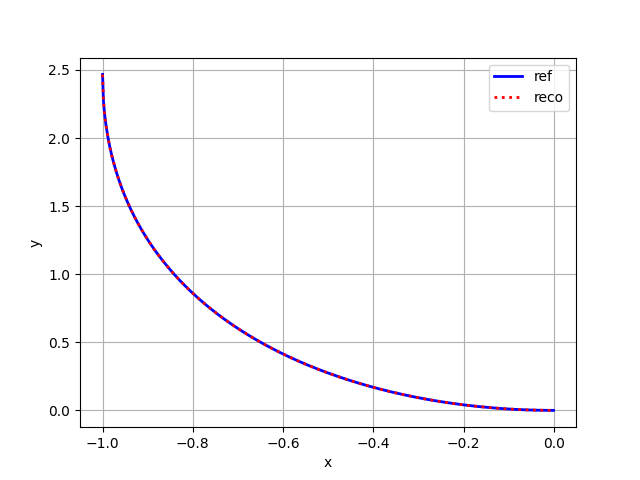

-----------------------------------------
--- Reconstructed function ---
-----------------------------------------


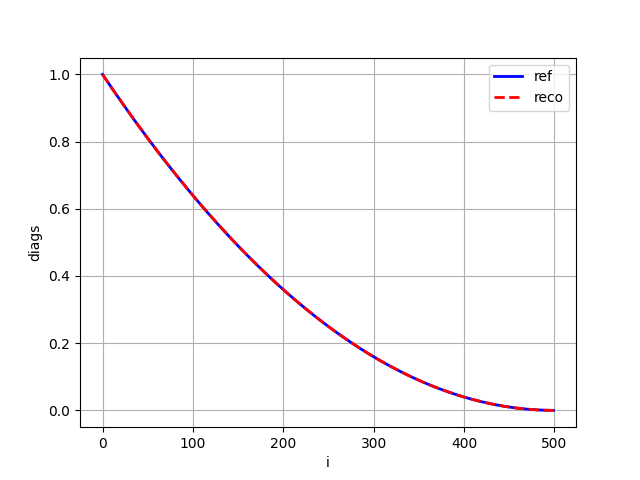

In [6]:
# --------------------------------------------------------
# --- Test 1.2: use x = [-1, 0] ---
# --------------------------------------------------------
mix.reload_module(mix)
mix.reload_module(ch)
def test_1_2():
    F = lambda x:  x**2
    Nx = 1000
    x = np.linspace(-1.0, 1.0, Nx)

    xh = x[:Nx//2] 
    y, y_ref, Nd = F(np.arcsin(xh)), F(xh), 64

    # --- Compute the Chebyschev coefficients ---
    oo_ch_ = ch.Ch_()
    oo_ch_.choose_method(0)
    oo_ch_.choose_func(
        -1, 0.0, 
        profile_in = y,
        name_prof  = "y",
        parity_in  = 0,
        path_root_in = "./jupyter-notebooks/NL/BE/coefs/",
        x_grid = xh # !!!
    )
    oo_ch_.compute_Ch(Nd)
    oo_ch_.plot_reconstructed_function()
    # oo_ch_.plot_errors()
    # oo_ch_.plot_coefficients()

    # --- Reconstrcut the function ---
    print("-----------------------------------------")
    print("--- Reconstructed function ---")
    print("-----------------------------------------")
    y_reco = oo_ch_.get_rec_y_sin_x(xh)

    # --- PLOTTING ---
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(range(len(xh)), y_ref,   "-", color="b", linewidth = 2, label = "ref")
    ax.plot(range(len(xh)), y_reco, "--", color="r", linewidth = 2, label = "reco")
    plt.xlabel('i')
    plt.ylabel("diags")
    plt.legend()
    plt.grid(True)
    plt.show()

    return
# -----------------------------------------------------------------------------

test_1_2()

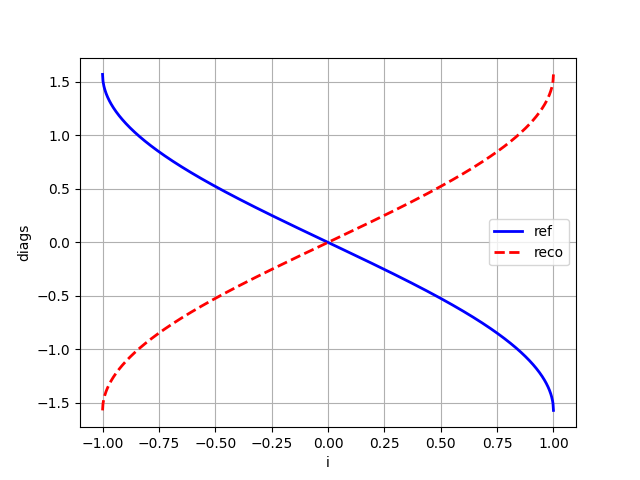

In [11]:
# --- PLOTTING ---
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.plot(        x,            F(x),   "-", color="b", linewidth = 2, label = "ref")
# ax.plot(np.sin(x), F(np.arcsin(x)), "--", color="r", linewidth = 2, label = "reco")
# plt.xlabel('i')
# plt.ylabel("diags")
# plt.legend()
# plt.grid(True)
# plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, np.arcsin(-x),   "-", color="b", linewidth = 2, label = "ref")
ax.plot(x, np.arcsin(x), "--", color="r", linewidth = 2, label = "reco")
plt.xlabel('i')
plt.ylabel("diags")
plt.legend()
plt.grid(True)
plt.show()


Chosen profile: y
Chosen parity: 0

Minimization method is used.
Computation status:  0.008663705189300198

Chosen polynomial's degree:	 64
Number of coefficients:		 32
max. abs. error: 3.491e-02


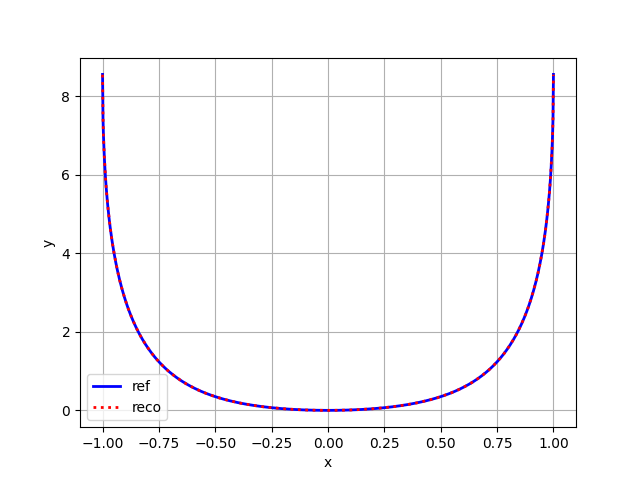

Chosen profile: y
Chosen parity: 1

Minimization method is used.
Computation status:  0.0011839689645196567

Chosen polynomial's degree:	 64
Number of coefficients:		 32
max. abs. error: 1.316e-02


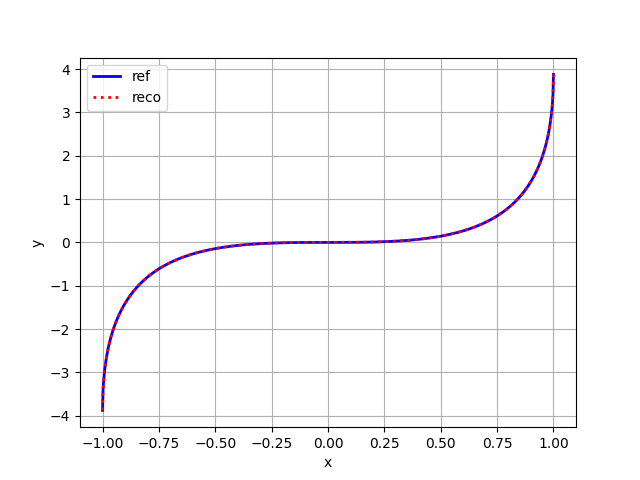

-----------------------------------------
--- Reconstructed function ---
-----------------------------------------
--- ASIN[X] ---


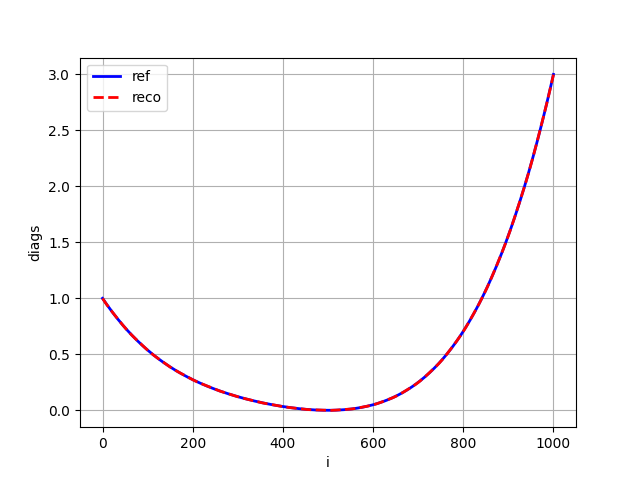

In [8]:
# ----------------------------------------------------------------------
# --- Test 2: from ODD and EVEN of F(asin[x]) back to F(x) ---
# ----------------------------------------------------------------------
mix.reload_module(mix)
mix.reload_module(ch)
def test_2():
    def comp_Ch(y1, parity_1):
        oo = ch.Ch_()
        oo.choose_method(0)
        oo.choose_func(
            -1, 0.0, 
            profile_in = y1,
            name_prof  = "y",
            parity_in  = parity_1,
            path_root_in = "./jupyter-notebooks/NL/BE/coefs/",
            x_grid = x # !!!
        )
        oo.compute_Ch(Nd)
        oo.plot_reconstructed_function()
        # oo_ch_.plot_errors()
        # oo_ch_.plot_coefficients()
        return oo
    # ---------------------------------------------------------------

    flag_asin = True

    F = lambda x:  x**2 + x**3 + x**4
    Nx = 1001
    x = np.linspace(-1.0, 1.0, Nx)

    if not flag_asin:
        y, y_ref, Nd = F(x), F(x), 10
    else:
        y, y_ref, Nd = F(np.arcsin(x)), F(x), 64

    y_even = 0.5 * (y + y[::-1])
    y_odd  = 0.5 * (y - y[::-1])

    # --- Compute the Chebyschev coefficients ---
    oo_even = comp_Ch(y_even, 0)
    oo_odd  = comp_Ch(y_odd, 1)

    # --- Reconstrcut the function ---
    print("-----------------------------------------")
    print("--- Reconstructed function ---")
    print("-----------------------------------------")
    if flag_asin:
        print("--- ASIN[X] ---")
        y_reco_even = oo_even.get_rec_y_sin_x()
        y_reco_odd  = oo_odd.get_rec_y_sin_x()
    else:
        print("--- [X] ---")
        y_reco_even = oo_even.get_rec_y_x()
        y_reco_odd  = oo_odd.get_rec_y_x()

    y_reco = y_reco_even + y_reco_odd

    # --- PLOTTING ---
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(range(len(x)), y_ref,   "-", color="b", linewidth = 2, label = "ref")
    ax.plot(range(len(x)), y_reco, "--", color="r", linewidth = 2, label = "reco")
    plt.xlabel('i')
    plt.ylabel("diags")
    plt.legend()
    plt.grid(True)
    plt.show()
    return
# ------------------------------------------------------------
test_2()

Chosen profile: y
Chosen parity: 0

Minimization method is used.
Computation status:  7.272311470006203e-31

Chosen polynomial's degree:	 64
Number of coefficients:		 32
max. abs. error: 1.110e-16
Chosen profile: y
Chosen parity: 1

Minimization method is used.
Computation status:  5.865369287792752e-06

Chosen polynomial's degree:	 64
Number of coefficients:		 32
max. abs. error: 9.053e-04
-----------------------------------------
--- Reconstructed function ---
-----------------------------------------
--- ASIN[X] ---


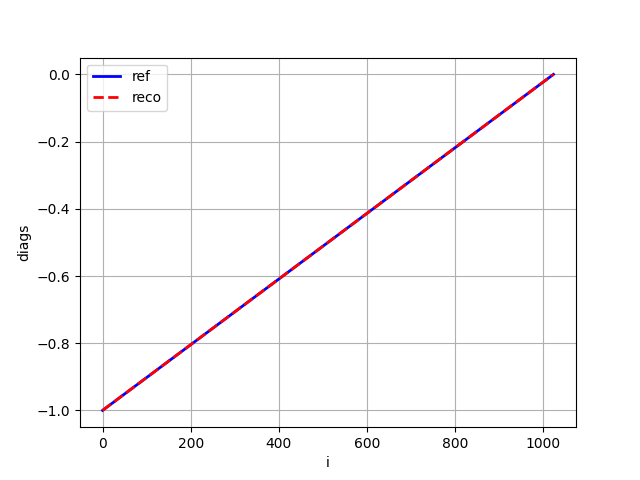

In [7]:
# ----------------------------------------------------------------------
# --- Test 3: from ODD and EVEN of HALF F(asin[x]) back to HALF F(x) ---
# ----------------------------------------------------------------------
mix.reload_module(mix)
mix.reload_module(ch)
def test_3():
    def comp_Ch(y1, parity_1):
        oo = ch.Ch_()
        oo.choose_method(0)
        oo.choose_func(
            -1, 0.0, 
            profile_in = y1,
            name_prof  = "y",
            parity_in  = parity_1,
            path_root_in = "./jupyter-notebooks/NL/BE/coefs/",
            x_grid = xh # !!!
        )
        oo.compute_Ch(Nd)
    #     oo.plot_reconstructed_function()
        # oo_ch_.plot_errors()
        # oo_ch_.plot_coefficients()
        return oo
    # ---------------------------------------------------------------

    flag_asin = True

    F = lambda x:  x**2 + x**3 + x**4
    # F = lambda x:  x

    nx = 11
    Nx = 2**nx
    Mx = 2**(nx-1)
    if not flag_asin:
        xh = np.linspace(-1.0, 1.0, Nx)
        y, y_ref, Nd = F(xh), F(xh), 10
    else:
        xh = np.linspace(-1.0, 1.0, Mx)
        y, y_ref, Nd = F(0.5*np.arcsin(xh) - 0.5), F(0.5*xh - 0.5), 64 
        
    y_even = 0.5 * (y + y[::-1])
    y_odd  = 0.5 * (y - y[::-1])

    # --- Compute the Chebyschev coefficients ---
    oo_even = comp_Ch(y_even, 0)
    oo_odd  = comp_Ch(y_odd,  1)

    # --- Reconstruct the function ---
    print("-----------------------------------------")
    print("--- Reconstructed function ---")
    print("-----------------------------------------")
    if flag_asin:
        print("--- ASIN[X] ---")
        y_reco_even = oo_even.get_rec_y_sin_x()
        y_reco_odd  = oo_odd.get_rec_y_sin_x()
    else:
        print("--- [X] ---")
        y_reco_even = oo_even.get_rec_y_x()
        y_reco_odd  = oo_odd.get_rec_y_x()

    y_reco = y_reco_even + y_reco_odd

    # --- PLOTTING ---
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(range(len(y_ref)),   y_ref,  "-", color="b", linewidth = 2, label = "ref")
    ax.plot(range(len(y_reco)), y_reco, "--", color="r", linewidth = 2, label = "reco")
    plt.xlabel('i')
    plt.ylabel("diags")
    plt.legend()
    plt.grid(True)
    plt.show()
    return
# ------------------------------------------------------------
test_3()

Chosen profile: y
Chosen parity: 0

Minimization method is used.
Computation status:  0.0013292936989428219

Chosen polynomial's degree:	 64
Number of coefficients:		 32
max. abs. error: 1.398e-02
Chosen profile: y
Chosen parity: 1

Minimization method is used.
Computation status:  0.0010088431592661753

Chosen polynomial's degree:	 64
Number of coefficients:		 32
max. abs. error: 1.187e-02
-----------------------------------------
--- Reconstructed function ---
-----------------------------------------
--- ASIN[X] ---


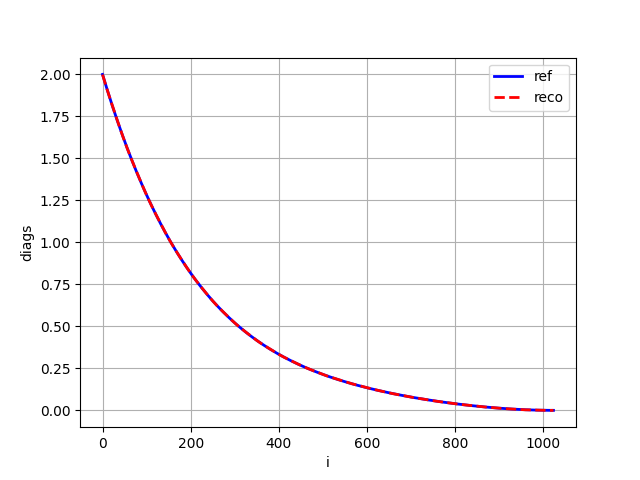

In [9]:
# ----------------------------------------------------------------------
# --- Test 3.2: from ODD and EVEN of HALF F(asin[x]) back to HALF F(x) ---
# ----------------------------------------------------------------------
mix.reload_module(mix)
mix.reload_module(ch)
def test_3_2():
    def comp_Ch(y1, parity_1):
        oo = ch.Ch_()
        oo.choose_method(0)
        oo.choose_func(
            -1, 0.0, 
            profile_in = y1,
            name_prof  = "y",
            parity_in  = parity_1,
            path_root_in = "./jupyter-notebooks/NL/BE/coefs/",
            x_grid = xh # !!!
        )
        oo.compute_Ch(Nd)
    #     oo.plot_reconstructed_function()
        # oo_ch_.plot_errors()
        # oo_ch_.plot_coefficients()
        return oo
    # ---------------------------------------------------------------

    flag_asin = True

    F = lambda x:  x**2 + x**3 + x**4 + x**6

    nx = 11
    Nx = 2**nx
    Mx = 2**(nx-1)
    if not flag_asin:
        xh = np.linspace(-1.0, 1.0, Nx)
        y, y_ref, Nd = F(xh), F(xh), 10
    else:
        xh = np.linspace(-1.0, 1.0, Mx)
        y, y_ref, Nd = F(0.5*np.arcsin(xh) - 0.5), F(0.5*xh - 0.5), 64 
        
    y_even = 0.5 * (y + y[::-1])
    y_odd  = 0.5 * (y - y[::-1])

    # --- Compute the Chebyschev coefficients ---
    oo_even = comp_Ch(y_even, 0)
    oo_odd  = comp_Ch(y_odd,  1)

    # --- Reconstruct the function ---
    print("-----------------------------------------")
    print("--- Reconstructed function ---")
    print("-----------------------------------------")
    if flag_asin:
        print("--- ASIN[X] ---")
        y_reco_even = oo_even.get_rec_y_sin_x()
        y_reco_odd  = oo_odd.get_rec_y_sin_x()
    else:
        print("--- [X] ---")
        y_reco_even = oo_even.get_rec_y_x()
        y_reco_odd  = oo_odd.get_rec_y_x()

    y_reco = y_reco_even + y_reco_odd

    # --- PLOTTING ---
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(range(len(y_ref)),   y_ref,  "-", color="b", linewidth = 2, label = "ref")
    ax.plot(range(len(y_reco)), y_reco, "--", color="r", linewidth = 2, label = "reco")
    plt.xlabel('i')
    plt.ylabel("diags")
    plt.legend()
    plt.grid(True)
    plt.show()
    return
# ------------------------------------------------------------
test_3_2()

In [25]:
x_coarse = np.linspace(-1.0, 1.0, 2**10)
print(x_coarse[2**9-1])
print(x_coarse[2**9])

-0.0009775171065493637
0.0009775171065493637
